In [123]:
import tensorflow as tf 

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [125]:
df=pd.read_csv('Churn_Modelling.csv')

In [126]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [127]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [128]:
geo = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)


In [129]:
X=X.drop(['Geography','Gender'],axis=1)

In [130]:
X = pd.concat([X,gender,geo],axis=1)

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on your feature data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,ELU,LeakyReLU,PReLU
from tensorflow.keras.layers import Dropout
# What Dropout does is it makes 30% of the neurons as NULL


In [134]:
classifier=Sequential()

In [135]:
# Adding 1 input and 2 Hidden Layers
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dense(units=6,activation='relu'))

In [136]:
#Adding the Output layer
classifier.add(Dense(1,activation='sigmoid'))

In [137]:
# By default adam uses learning rate as 0.1
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [138]:
# You can even change the learning rate 
"""import tensorflow 
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)"""

In [144]:
# Early Stopping 

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience= 20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [145]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3199 - accuracy: 0.8698 - val_loss: 0.3587 - val_accuracy: 0.8504
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3186 - accuracy: 0.8727 - val_loss: 0.3597 - val_accuracy: 0.8485
Epoch 3/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3181 - accuracy: 0.8679 - val_loss: 0.3603 - val_accuracy: 0.8512
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3190 - accuracy: 0.8688 - val_loss: 0.3610 - val_accuracy: 0.8493
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3177 - accuracy: 0.8699 - val_loss: 0.3597 - val_accuracy: 0.8504
Epoch 6/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3185 - accuracy: 0.8694 - val_loss: 0.3614 - val_accuracy: 0.8489
Epoch 7/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3179 - accuracy: 0.8699 - val_loss: 0.3603 - val_accuracy: 0.8478

In [146]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

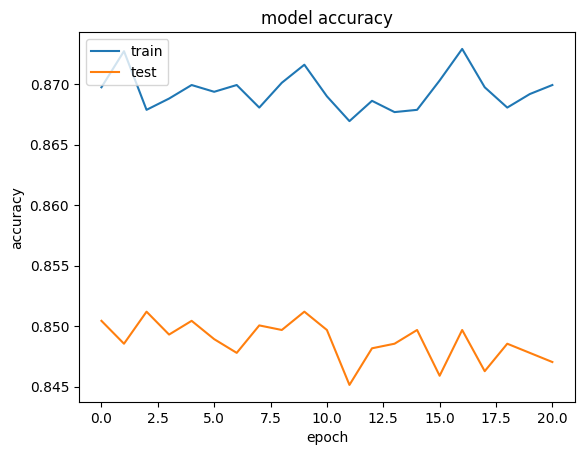

In [151]:
# Summarize History for accuracy 
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [147]:
# Get your Weights 